In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [27]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"daffafauzi","key":"b90bd19aecc9388089f491891801ca02"}'}

In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [29]:
!kaggle datasets download -d rinichristy/2022-fuel-consumption-ratings

Dataset URL: https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings
License(s): CC0-1.0
2022-fuel-consumption-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!mkdir fuel
!unzip 2022-fuel-consumption-ratings.zip -d fuel
!ls fuel

mkdir: cannot create directory ‘fuel’: File exists
Archive:  2022-fuel-consumption-ratings.zip
replace fuel/MY2022 Fuel Consumption Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fuel/MY2022 Fuel Consumption Ratings.csv  
'MY2022 Fuel Consumption Ratings.csv'


In [31]:
df = pd.read_csv('/content/fuel/MY2022 Fuel Consumption Ratings.csv')


In [32]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [34]:
df['Make'].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [35]:
df['Vehicle Class'].unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

In [36]:
mapping = {'Compact':"0",
           'SUV: Small':'1',
           ',Mid-size':"2",
           "Minicompact":"3",
           "SUV: Standard":"4",
           "Two-seater":"5",
           "Subcompact":"6",
           "Station wagon: Small":"7",
           "Station wagon: Mid-size":"8",
           "Full-size":"9",
           "Pickup truck: Small":"10",
           "Pickup truck: Standard":"11",
           "Minivan":"12",
           "Special purpose vehicle":"13"
          }
df['Vehicle Class'] = df['Vehicle Class'].map(mapping)

In [37]:
df['CO2 Rating'].unique()

array([ 6,  4,  5,  3,  7,  2,  1,  8,  9, 10])

In [38]:
df["Vehicle Class"] = pd.to_numeric(df["Vehicle Class"])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      829 non-null    float64
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [40]:
df.isna().sum()

Model Year                             0
Make                                   0
Model                                  0
Vehicle Class                        117
Engine Size(L)                         0
Cylinders                              0
Transmission                           0
Fuel Type                              0
Fuel Consumption (City (L/100 km)      0
Fuel Consumption(Hwy (L/100 km))       0
Fuel Consumption(Comb (L/100 km))      0
Fuel Consumption(Comb (mpg))           0
CO2 Emissions(g/km)                    0
CO2 Rating                             0
Smog Rating                            0
dtype: int64

In [41]:
df = df.fillna(0)

In [42]:
df.isna().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [43]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,0.0,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,1.0,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,1.0,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,1.0,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,0.0,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [45]:
features = ['Fuel Consumption(Comb (mpg))','Smog Rating','Vehicle Class','Cylinders','Engine Size(L)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption (City (L/100 km)']
x = df[features].values
y = df['CO2 Rating'].values
x.shape, y.shape

((946, 7), (946,))

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2,test_size=0.1)
y_test.shape
x_train.shape

(851, 7)

In [47]:
print(x.shape, x_train.shape, x_test.shape)

(946, 7) (851, 7) (95, 7)


In [48]:
print(y.shape, y_train.shape, y_test.shape)

(946,) (851,) (95,)


In [49]:
df['CO2 Rating'].unique()

array([ 6,  4,  5,  3,  7,  2,  1,  8,  9, 10])

In [50]:
model = Sequential([
  layers.Dense(50, activation='relu', input_dim=x.shape[-1]),
  layers.Dense(100, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6510 (25.43 KB)
Trainable params: 6510 (25.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
epochs=10
history = model.fit(
  x_train,
  y_train,
  batch_size=1,
  shuffle=True,
  verbose=1,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


851/851 [==============================] - 4s 3ms/step - loss: 1.0874 - accuracy: 0.6110
Epoch 2/10
851/851 [==============================] - 2s 2ms/step - loss: 0.6804 - accuracy: 0.7321
Epoch 3/10
851/851 [==============================] - 3s 3ms/step - loss: 0.5610 - accuracy: 0.7709
Epoch 4/10
851/851 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7814
Epoch 5/10
851/851 [==============================] - 2s 3ms/step - loss: 0.4863 - accuracy: 0.8096
Epoch 6/10
851/851 [==============================] - 2s 2ms/step - loss: 0.4636 - accuracy: 0.8049
Epoch 7/10
851/851 [==============================] - 2s 3ms/step - loss: 0.4417 - accuracy: 0.8284
Epoch 8/10
851/851 [==============================] - 3s 3ms/step - loss: 0.4220 - accuracy: 0.8261
Epoch 9/10
851/851 [==============================] - 3s 3ms/step - loss: 0.3854 - accuracy: 0.8402
Epoch 10/10
851/851 [==============================] - 2s 3ms/step - loss: 0.3904 - accuracy: 0.8343


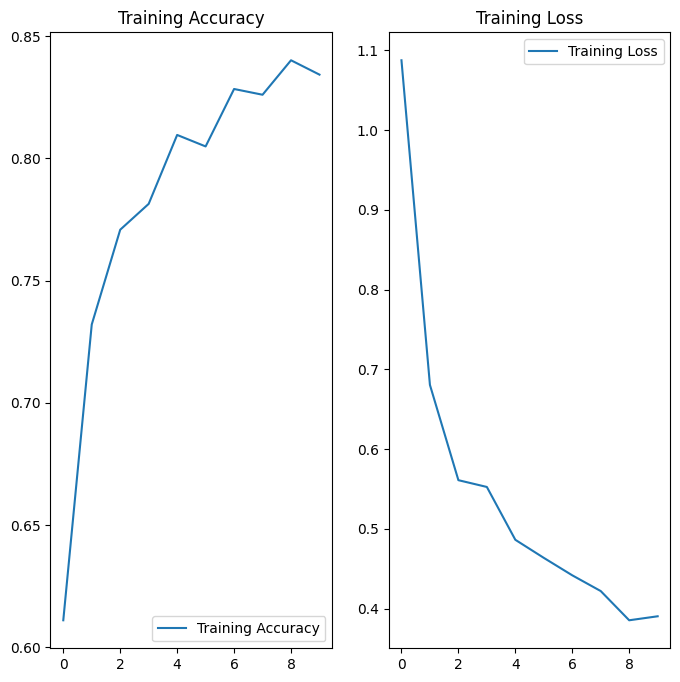

In [54]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [55]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

3/3 [==============================] - 0s 3ms/step
0.8526315789473684


In [56]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,0.0,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,1.0,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,1.0,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,1.0,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,0.0,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [57]:
df['CO2 Rating'].unique()

array([ 6,  4,  5,  3,  7,  2,  1,  8,  9, 10])

In [58]:
#fitur='Fuel Consumption(Comb (mpg))','Smog Rating','Vehicle Class','Cylinders','Engine Size(L)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption (City (L/100 km)'
class_name = [ "6(Baik)",  "4:Cukup Baik",  "5:Cukup Baik",  "3:Buruk",  "7:Baik",  "2:Buruk",  "1:Buruk",  "8:Sangat Baik",  "9:Sangat Baik", "10:Sangat Baik"]
a = [11.2,4,1,6,3.5,9.4,12.6]
a = np.array(a) # convert to a numpy array
a = np.expand_dims(a, 0) # change shape from (8,) to (1,8)

predictions = model.predict(a)
score = tf.nn.softmax(predictions[0])

print(
    "Nilai Co2 Rating Mobil Ini adalah: {}"
    .format(class_name[np.argmax(score)])
)

1/1 [==============================] - 0s 16ms/step
Nilai Co2 Rating Mobil Ini adalah: 5:Cukup Baik


In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_co2rating.tflite", "wb") as f:
  f.write(tflite_model)

In [60]:
print("Tensorflow versi: "+tf.__version__)

Tensorflow versi: 2.15.0
